In [1]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# functions to convert UTC to Pacific time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('US/Pacific'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_minute = lambda x: convert_tz(x).minute
get_day_of_week = lambda x: convert_tz(x).weekday()

In [3]:
steps = pd.read_csv("StepCount.csv")

C:\Users\LR487BX\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# parse out date and time elements as Pacific time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)

In [40]:
steps.tail(10)

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow
213309,Vinayak’s Apple Watch,7.6.2,"<<HKDevice: 0x283c60aa0>, name:Apple Watch, ma...",StepCount,count,2022-02-04 20:49:46 -0800,2022-02-04 20:39:02-08:00,2022-02-04 20:40:24 -0800,68,2022,2022-02,2022-02-04,4,12,4
213310,iPhone,14.7.1,"<<HKDevice: 0x283c626c0>, name:iPhone, manufac...",StepCount,count,2022-02-04 21:40:20 -0800,2022-02-04 21:29:14-08:00,2022-02-04 21:29:55 -0800,43,2022,2022-02,2022-02-04,4,13,4
213311,Vinayak’s Apple Watch,7.6.2,"<<HKDevice: 0x283c60aa0>, name:Apple Watch, ma...",StepCount,count,2022-02-04 21:39:15 -0800,2022-02-04 21:29:05-08:00,2022-02-04 21:30:31 -0800,21,2022,2022-02,2022-02-04,4,13,4
213312,Vinayak’s Apple Watch,7.6.2,"<<HKDevice: 0x283c60aa0>, name:Apple Watch, ma...",StepCount,count,2022-02-04 21:51:45 -0800,2022-02-04 21:40:29-08:00,2022-02-04 21:47:53 -0800,158,2022,2022-02,2022-02-04,4,13,4
213313,iPhone,14.7.1,"<<HKDevice: 0x283c626c0>, name:iPhone, manufac...",StepCount,count,2022-02-04 21:53:22 -0800,2022-02-04 21:41:57-08:00,2022-02-04 21:48:26 -0800,86,2022,2022-02,2022-02-04,4,13,4
213314,iPhone,14.7.1,"<<HKDevice: 0x283c626c0>, name:iPhone, manufac...",StepCount,count,2022-02-05 10:51:30 -0800,2022-02-05 10:39:57-08:00,2022-02-05 10:49:17 -0800,86,2022,2022-02,2022-02-05,5,2,5
213315,iPhone,14.7.1,"<<HKDevice: 0x283c626c0>, name:iPhone, manufac...",StepCount,count,2022-02-05 11:08:06 -0800,2022-02-05 10:51:00-08:00,2022-02-05 10:51:16 -0800,11,2022,2022-02,2022-02-05,5,2,5
213316,iPhone,14.7.1,"<<HKDevice: 0x283c626c0>, name:iPhone, manufac...",StepCount,count,2022-02-05 11:12:27 -0800,2022-02-05 11:09:24-08:00,2022-02-05 11:10:07 -0800,77,2022,2022-02,2022-02-05,5,3,5
213317,iPhone,14.7.1,"<<HKDevice: 0x283c626c0>, name:iPhone, manufac...",StepCount,count,2022-02-05 11:31:32 -0800,2022-02-05 11:20:29-08:00,2022-02-05 11:20:50 -0800,30,2022,2022-02,2022-02-05,5,3,5
213318,iPhone,14.7.1,"<<HKDevice: 0x283c626c0>, name:iPhone, manufac...",StepCount,count,2022-02-05 12:17:20 -0800,2022-02-05 12:07:47-08:00,2022-02-05 12:07:52 -0800,12,2022,2022-02,2022-02-05,5,4,5


In [7]:
steps_by_date = steps.groupby(['date'])['value'].sum().reset_index(name='Steps')

In [8]:
steps_by_date.tail()

,date,Steps
2624,2022-02-01,9545
2625,2022-02-02,8919
2626,2022-02-03,7735
2627,2022-02-04,10715
2628,2022-02-05,216


In [9]:
steps_by_date.to_csv("steps_per_day.csv", index=False)

In [10]:
steps_device_by_year = steps.groupby(['year', 'sourceName'])['value'].sum().reset_index(name='Steps')

In [11]:
steps_device_by_year

,year,sourceName,Steps
0,2014,iPhone,173174
1,2015,iPhone,1365403
2,2016,iPhone,1336513
3,2017,iPhone,1055104
4,2018,iPhone,2629005
5,2019,Vinayak’s Apple Watch,96516
6,2019,iPhone,1838470
7,2020,Vinayak’s Apple Watch,1303074
8,2020,iPhone,2542656
9,2021,Vinayak’s Apple Watch,1545960


In [12]:
steps_device_by_year = steps.groupby(['year'])['value'].sum().reset_index(name='Steps')

In [13]:
steps_device_by_year

,year,Steps
0,2014,173174
1,2015,1365403
2,2016,1336513
3,2017,1055104
4,2018,2629005
5,2019,1934986
6,2020,3845730
7,2021,3301004
8,2022,546450


<AxesSubplot:title={'center':'Daily step counts rolling mean over 10 days'}, xlabel='date'>

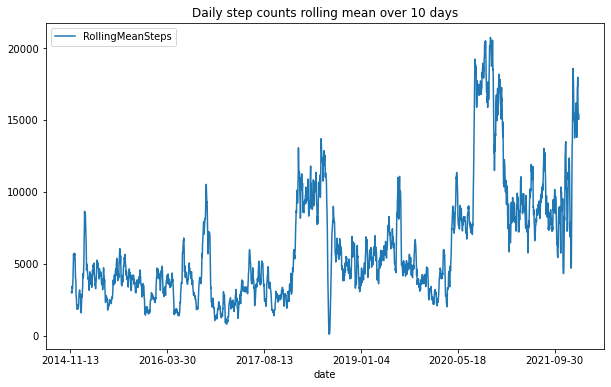

In [14]:
steps_by_date['RollingMeanSteps'] = steps_by_date.Steps.rolling(window=10, center=True).mean()
steps_by_date.plot(x='date', y='RollingMeanSteps', title= 'Daily step counts rolling mean over 10 days', figsize=[10, 6])

In [15]:
steps_by_date['date'] = pd.to_datetime(steps_by_date['date'])
steps_by_date['dow'] = steps_by_date['date'].dt.weekday

Text(0.5, 0, 'Day of Week')

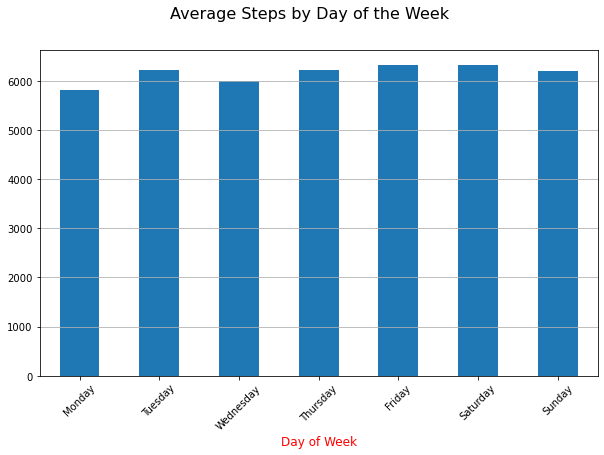

In [16]:
data = steps_by_date.groupby(['dow'])['Steps'].mean()

fig, ax = plt.subplots(figsize=[10, 6])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)

plt.suptitle('Average Steps by Day of the Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Day of Week', fontsize=12, color='red')

In [17]:
total_steps_by_month = steps.groupby(['month'])['value'].sum().reset_index(name='Steps')

In [18]:
total_steps_by_month

,month,Steps
0,2014-11,64187
1,2014-12,108987
2,2015-01,143877
3,2015-02,113736
4,2015-03,132152
...,...,...
83,2021-10,247256
84,2021-11,271352
85,2021-12,281202
86,2022-01,509320


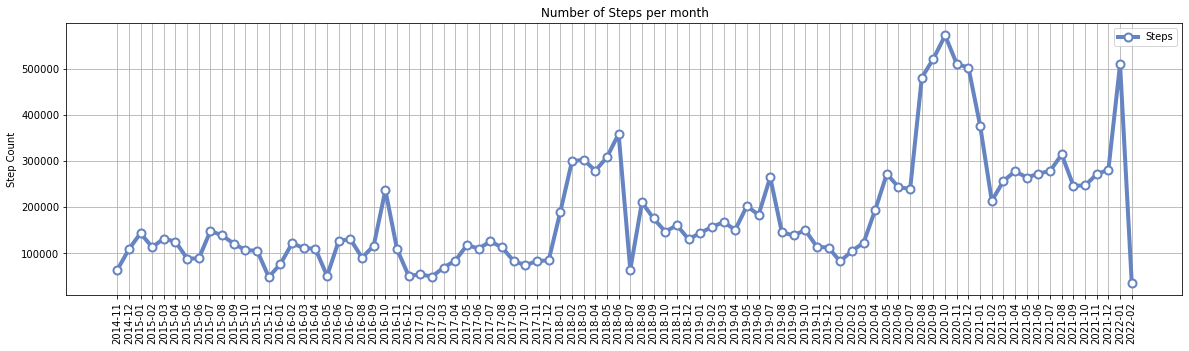

In [19]:
# a bit of a hackish solution, could use improvement
dataset = total_steps_by_month
chart_title = 'Number of Steps per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[20, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Step Count')
# ax.set_xlabel('')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

In [20]:
total_steps_by_years = steps.groupby(['year'])['value'].sum().reset_index(name='Steps')

In [21]:
total_steps_by_years

,year,Steps
0,2014,173174
1,2015,1365403
2,2016,1336513
3,2017,1055104
4,2018,2629005
5,2019,1934986
6,2020,3845730
7,2021,3301004
8,2022,546450


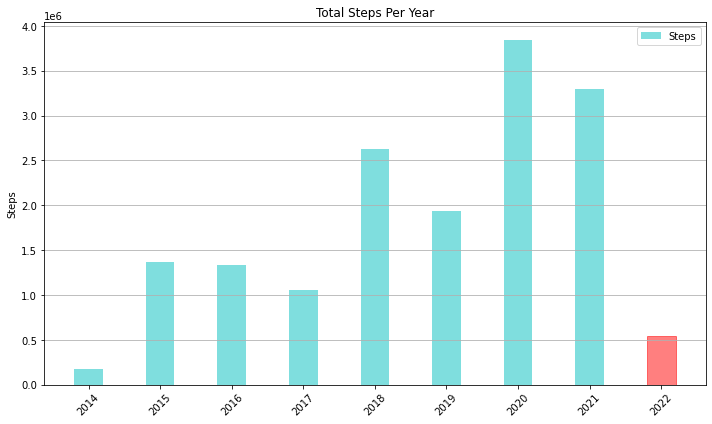

In [22]:
dataset = total_steps_by_years

n_groups = len(dataset)
opacity = 0.5
fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)
index = np.arange(n_groups)
bar_width = 0.4

data = plt.bar(index, dataset.Steps, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Steps')

data[-1].set_color('r')

plt.ylabel('Steps')
plt.title('Total Steps Per Year')
plt.xticks(index, dataset.year, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
hour_steps = steps.groupby(['hour'])['value'].sum().reset_index(name='Steps')

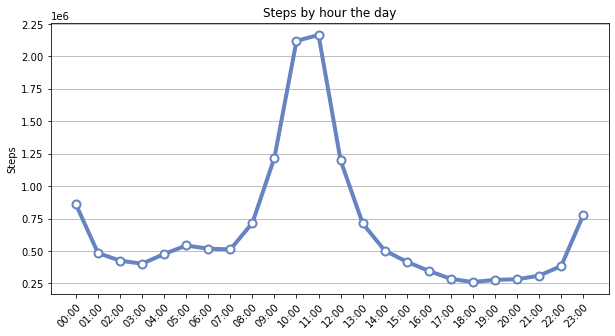

In [24]:
ax = hour_steps.Steps.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_steps.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

# ax.set_xlim((hour_steps.index[0], hour_steps.index[-1]))

ax.yaxis.grid(True)
# ax.set_ylim((0, 1300))
ax.set_ylabel('Steps')
ax.set_xlabel('')
ax.set_title('Steps by hour the day')

plt.show()

In [25]:
weight = pd.read_csv("BodyMass.csv")

In [26]:
weight

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Health,10.0,NaN,BodyMass,lb,2016-10-04 23:07:05 -0800,2016-10-04 23:07:05 -0800,2016-10-04 23:07:05 -0800,149.914


In [27]:
resting = pd.read_csv("RestingHeartRate.csv")
len(resting)

494

In [28]:
# parse out date and time elements as Pacific time
resting['startDate'] = pd.to_datetime(resting['startDate'])
resting['year'] = resting['startDate'].map(get_year)
resting['month'] = resting['startDate'].map(get_month)
resting['date'] = resting['startDate'].map(get_date)

<AxesSubplot:title={'center':'Resting HR'}, xlabel='date'>

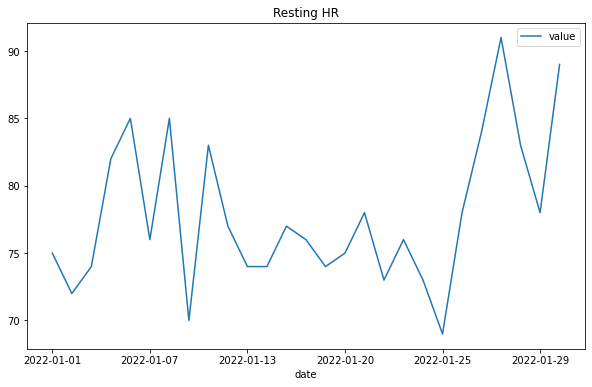

In [29]:
resting[resting.month == '2022-01'].plot(x='date', y='value', title= 'Resting HR', figsize=[10, 6])

<AxesSubplot:title={'center':'Resting HR'}, xlabel='date'>

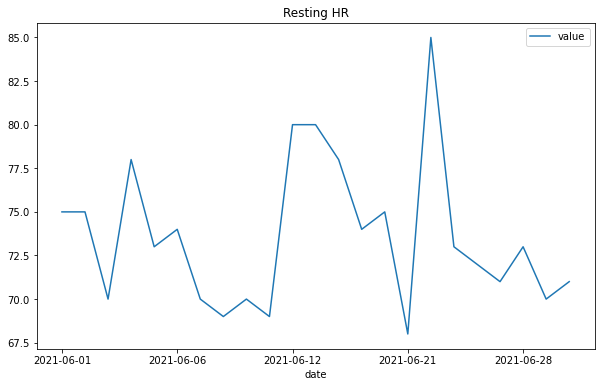

In [30]:
resting[resting.month == '2021-06'].plot(x='date', y='value', title= 'Resting HR', figsize=[10, 6])

In [31]:
hr = pd.read_csv("HeartRate.csv")
len(hr)

79927

In [32]:
# parse out date and time elements as Pacific time
hr['startDate'] = pd.to_datetime(hr['startDate'])
hr['year'] = hr['startDate'].map(get_year)
hr['month'] = hr['startDate'].map(get_month)
hr['hour'] = hr['startDate'].map(get_hour)
hr['date'] = hr['startDate'].map(get_date)

<AxesSubplot:title={'center':'HR'}, xlabel='startDate'>

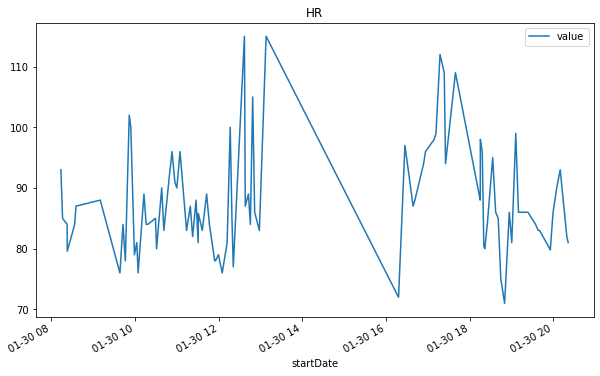

In [33]:
# plot a single day
test_date = '2022-01-30'
# len(hr[hr.date == test_date])
# TODO: Fix Axis for Hour of Day or Something Similar
hr[hr.date == test_date].plot(x='startDate', y='value', title= 'HR', figsize=[10, 6])

In [34]:
sleep_raw = pd.read_csv("SleepAnalysis.csv")

In [35]:
sleep_raw.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
846,iPhone,14.7.1,NaN,SleepAnalysis,NaN,2022-02-04 07:24:30 -0800,2022-02-03 22:07:47 -0800,2022-02-03 23:15:05 -0800,HKCategoryValueSleepAnalysisInBed
847,iPhone,14.7.1,NaN,SleepAnalysis,NaN,2022-02-04 07:24:30 -0800,2022-02-03 23:16:11 -0800,2022-02-03 23:16:12 -0800,HKCategoryValueSleepAnalysisInBed
848,iPhone,14.7.1,NaN,SleepAnalysis,NaN,2022-02-04 07:24:30 -0800,2022-02-03 23:16:52 -0800,2022-02-04 06:45:07 -0800,HKCategoryValueSleepAnalysisInBed
849,iPhone,14.7.1,NaN,SleepAnalysis,NaN,2022-02-04 07:24:30 -0800,2022-02-04 06:45:24 -0800,2022-02-04 07:24:30 -0800,HKCategoryValueSleepAnalysisInBed
850,iPhone,14.7.1,NaN,SleepAnalysis,NaN,2022-02-05 07:28:22 -0800,2022-02-04 23:42:56 -0800,2022-02-05 07:28:22 -0800,HKCategoryValueSleepAnalysisInBed


In [36]:
distance_walking_running = pd.read_csv("DistanceWalkingRunning.csv")

C:\Users\LR487BX\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
distance_walking_running.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
262699,iPhone,14.7.1,"<<HKDevice: 0x283c04a00>, name:iPhone, manufac...",DistanceWalkingRunning,mi,2022-02-05 10:51:30 -0800,2022-02-05 10:39:57 -0800,2022-02-05 10:49:17 -0800,0.035084
262700,iPhone,14.7.1,"<<HKDevice: 0x283c04a00>, name:iPhone, manufac...",DistanceWalkingRunning,mi,2022-02-05 11:08:06 -0800,2022-02-05 10:51:00 -0800,2022-02-05 10:51:16 -0800,0.004918
262701,iPhone,14.7.1,"<<HKDevice: 0x283c04a00>, name:iPhone, manufac...",DistanceWalkingRunning,mi,2022-02-05 11:12:27 -0800,2022-02-05 11:09:24 -0800,2022-02-05 11:10:07 -0800,0.031701
262702,iPhone,14.7.1,"<<HKDevice: 0x283c04a00>, name:iPhone, manufac...",DistanceWalkingRunning,mi,2022-02-05 11:31:32 -0800,2022-02-05 11:20:29 -0800,2022-02-05 11:20:50 -0800,0.012308
262703,iPhone,14.7.1,"<<HKDevice: 0x283c04a00>, name:iPhone, manufac...",DistanceWalkingRunning,mi,2022-02-05 12:17:20 -0800,2022-02-05 12:07:47 -0800,2022-02-05 12:07:52 -0800,0.005496


In [38]:
distance_walking_running['startDate'] = pd.to_datetime(hr['startDate'])
distance_walking_running['year'] = hr['startDate'].map(get_year)
distance_walking_running['month'] = hr['startDate'].map(get_month)
distance_walking_running['hour'] = hr['startDate'].map(get_hour)
distance_walking_running['date'] = hr['startDate'].map(get_date)

<AxesSubplot:title={'center':'distance_walking_running'}, xlabel='startDate'>

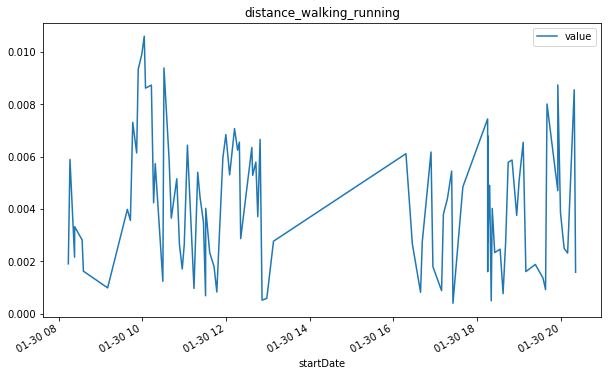

In [39]:
# plot a single day
test_date = '2022-01-30'
# len(hr[hr.date == test_date])
# TODO: Fix Axis for Hour of Day or Something Similar
distance_walking_running[distance_walking_running.date == test_date].plot(x='startDate', y='value', title= 'distance_walking_running', figsize=[10, 6])